In [7]:
import torchio as tio
import os
from scripts.utils import load_metadata, save_metadata
import matplotlib.pyplot as plt
from monai.transforms import Spacing


In [8]:
metadata = load_metadata()

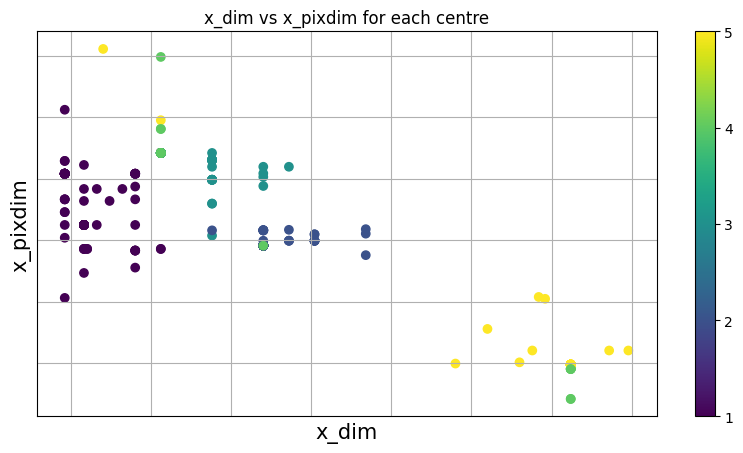

In [9]:
plt.scatter(metadata["x_dim"], metadata["x_pixdim"], c=metadata["Centre"])
plt.xlabel("x_dim", fontsize=15)
plt.ylabel("x_pixdim", fontsize=15)
plt.colorbar(ticks=[1, 2, 3, 4, 5])
plt.title("x_dim vs x_pixdim for each centre")
plt.grid(alpha=1)
plt.show()

Start
original from Centre 4


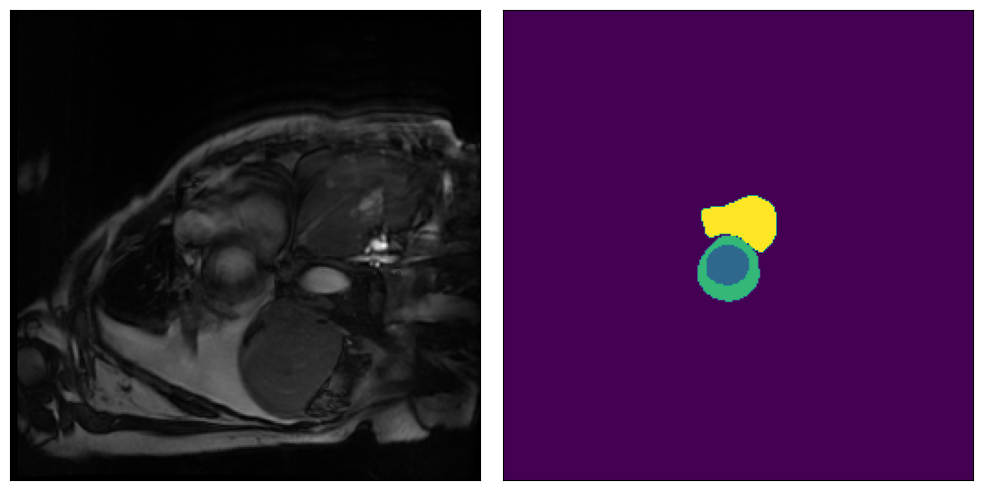

resampled


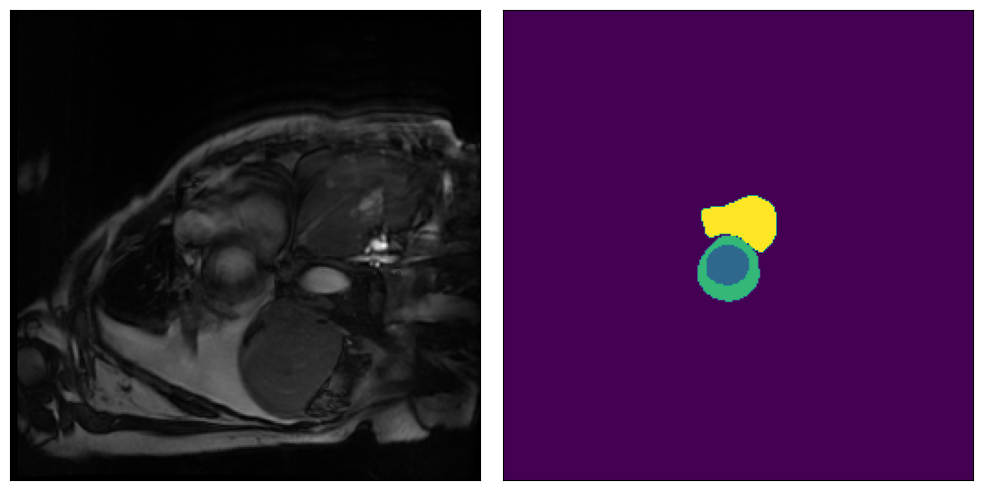

In [27]:
subjects_ids = list(metadata.index)
plt.rcParams['figure.figsize'] = [10, 5]

print("Start")
for subject_id in ["D3K5Q2"]:#subjects_ids[:20]:
    ed_index, es_index, image_path, seg_path = metadata.loc[
        subject_id, ["ED", "ES", "Image_path", "Seg_path"]
    ]

    image = tio.ScalarImage(image_path)
    seg = tio.LabelMap(seg_path)

    # Only keep ED and ES
    image.set_data(image.data[[ed_index, es_index]])
    seg.set_data(seg.data[[ed_index, es_index]])

    c, h, w, d = seg.shape
    x_pixdim, y_pix_dim, z_pix_dim = image.spacing

    # Get the centre of the subject from metadata
    centre= metadata.loc[subject_id, ["Centre"]]

    print("original from Centre", centre[0])
    plt.subplot(1, 2, 1)
    plt.imshow(image.data[1, :, :, 2], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(seg.data[1, :, :, 2])
    plt.tight_layout()
    plt.show()


    if h > 400 or w > 400:
        transform = tio.transforms.Compose(
            [
                tio.transforms.Resample((1.3, 1.3, z_pix_dim)),
                # tio.transforms.Resize((h//2, w//2, d)),
                # tio.transforms.CropOrPad((256, 256, d)),


            ]
        )
    else:
        transform = tio.transforms.Compose(
            [
                tio.transforms.CropOrPad((256, 256, d)),

            ]
        )
    image = transform(image)
    seg = transform(seg)

    print("resampled")
    plt.subplot(1, 2, 1)
    plt.imshow(image.data[1, :, :, 2], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(seg.data[1, :, :, 2])
    plt.tight_layout()
    plt.show()